In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# plt.style.use('ggplot')
import seaborn as sns


#Tells pandas to show all columns when displaying the DataFrame
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv('colleges.csv') 
df.shape

(3798, 509)

## Changing column type
- The column `df.LOCALE` is a float type and I wanted to just use integers so I am changing it to an `int`

- This column is significant because the value of `11` and `12` refer to the size of the city. 
    - `11` == City: Large (population of 250,000 or more)
    - `12` == City: Midsize (population of at least 100,000 but less than 250,000)
    
- Per project outline a sstrong desire was to be in a `Urban` setting and this provides a quick way of removing some observations

In [3]:
# chanage column LOCALE from float to int

df.astype({'LOCALE': 'int'}).dtypes

Unnamed: 0                      int64
unitid                          int64
chronname                      object
city                           object
state                          object
                                ...  
NOPELL_RPY_3YR_RT_SUPP         object
FEMALE_RPY_3YR_RT_SUPP         object
MALE_RPY_3YR_RT_SUPP           object
FIRSTGEN_RPY_3YR_RT_SUPP       object
NOTFIRSTGEN_RPY_3YR_RT_SUPP    object
Length: 509, dtype: object

In [4]:
# taking current dataframe and excluding all other rows where the column LOCALE does not == 11 or 12
df = df[(df['LOCALE'] == 11) | (df['LOCALE'] == 12)]
df.shape

(1301, 509)

## The column `region` is divided among the following:
- 0	U.S. Service Schools

- 1	New England (CT, ME, MA, NH, RI, VT)

- 2	Mid East (DE, DC, MD, NJ, NY, PA)

- 3	Great Lakes (IL, IN, MI, OH, WI)

- 4	Plains (IA, KS, MN, MO, NE, ND, SD)

- 5	Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)

- 6	Southwest (AZ, NM, OK, TX)

- 7	Rocky Mountains (CO, ID, MT, UT, WY)

- 8	Far West (AK, CA, HI, NV, OR, WA)

- 9	Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)

In [5]:
regions = [1, 2, 5, 6, 8]

In [6]:
# based on profile from the project I selected on the regions that fit

df = df.loc[df.region.isin(regions), :]
df.head()

,Unnamed: 0,unitid,chronname,city,state,level,control,basic,hbcu,flagship,long_x,lat_y,site,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,exp_award_natl_value,exp_award_percentile,ft_pct,fte_value,fte_percentile,med_sat_value,med_sat_percentile,aid_value,aid_percentile,endow_value,endow_percentile,grad_100_value,grad_100_percentile,grad_150_value,grad_150_percentile,pell_value,pell_percentile,retain_value,retain_percentile,ft_fac_value,ft_fac_percentile,vsa_year,vsa_grad_after4_first,vsa_grad_elsewhere_after4_first,vsa_enroll_after4_first,vsa_enroll_elsewhere_after4_first,vsa_grad_after6_first,vsa_grad_elsewhere_after6_first,vsa_enroll_after6_first,vsa_enroll_elsewhere_after6_first,vsa_grad_after4_transfer,vsa_grad_elsewhere_after4_transfer,vsa_enroll_after4_transfer,vsa_enroll_elsewhere_after4_transfer,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,HCM2,main,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,st_fips,region,LOCALE,LATITUDE,LONGITUDE,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,PCIP13,PCIP14,PCIP15,PCIP16,PCIP19,PCIP22,PCIP23,PCIP24,PCIP25,PCIP26,PCIP27,PCIP29,PCIP30,PCIP31,PCIP38,PCIP39,PCIP40,PCIP41,PCIP42,PCIP43,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54,CIP01CERT1,CIP01CERT2,CIP01ASSOC,CIP01CERT4,CIP01BACHL,CIP03CERT1,CIP03CERT2,CIP03ASSOC,CIP03CERT4,CIP03BACHL,CIP04CERT1,CIP04CERT2,CIP04ASSOC,CIP04CERT4,CIP04BACHL,CIP05CERT1,CIP05CERT2,CIP05ASSOC,CIP05CERT4,CIP05BACHL,CIP09CERT1,CIP09CERT2,CIP09ASSOC,CIP09CERT4,CIP09BACHL,CIP10CERT1,CIP10CERT2,CIP10ASSOC,CIP10CERT4,CIP10BACHL,CIP11CERT1,CIP11CERT2,CIP11ASSOC,CIP11CERT4,CIP11BACHL,CIP12CERT1,CIP12CERT2,CIP12ASSOC,CIP12CERT4,CIP12BACHL,CIP13CERT1,CIP13CERT2,CIP13ASSOC,CIP13CERT4,CIP13BACHL,CIP14CERT1,CIP14CERT2,CIP14ASSOC,CIP14CERT4,CIP14BACHL,CIP15CERT1,CIP15CERT2,CIP15ASSOC,CIP15CERT4,CIP15BACHL,CIP16CERT1,CIP16CERT2,CIP16ASSOC,CIP16CERT4,CIP16BACHL,CIP19CERT1,CIP19CERT2,CIP19ASSOC,CIP19CERT4,CIP19BACHL,CIP22CERT1,CIP22CERT2,CIP22ASSOC,CIP22CERT4,CIP22BACHL,CIP23CERT1,CIP23CERT2,CIP23ASSOC,CIP23CERT4,CIP23BACHL,CIP24CERT1,CIP24CERT2,CIP24ASSOC,CIP24CERT4,CIP24BACHL,CIP25CERT1,CIP25CERT2,CIP25ASSOC,CIP25CERT4,CIP25BACHL,CIP26CERT1,CIP26CERT2,CIP26ASSOC,CIP26CERT4,CIP26BACHL,CIP27CERT1,CIP27CERT2,CIP27ASSOC,CIP27CERT4,CIP27BACHL,CIP29CERT1,CIP29CERT2,CIP29ASSOC,CIP29CERT4,CIP29BACHL,CIP30CERT1,CIP30CERT2,CIP30ASSOC,CIP30CERT4,CIP30BACHL,CIP31CERT1,CIP31CERT2,CIP31ASSOC,CIP31CERT4,CIP31BACHL,CIP38CERT1,CIP38CERT2,CIP38ASSOC,CIP38CERT4,CIP38BACHL,CIP39CERT1,CIP39CERT2,CIP39ASSOC,CIP39CERT4,CIP39BACHL,CIP40CERT1,CIP40CERT2,CIP40ASSOC,CIP40CERT4,CIP40BACHL,CIP41CERT1,CIP41CERT2,CIP41ASSOC,CIP41CERT4,CIP41BACHL,CIP42CERT1,CIP42CERT2,CIP42ASSOC,CIP42CERT4,CIP42BACHL,CIP43CERT1,CIP43CERT2,CIP43ASSOC,CIP43CERT4,CIP43BACHL,CIP44CERT1,CIP44CERT2,CIP44ASSOC,CIP44CERT4,CIP44BACHL,CIP45CERT1,CIP45CERT2,CIP45ASSOC,CIP45CERT4,CIP45BACHL,CIP46CERT1,CIP46CERT2,CIP46ASSOC,CIP46CERT4,CIP46BACHL,CIP47CERT1,CIP47CERT2,CIP47ASSOC,CIP47CERT4,CIP47BACHL,CIP48CERT1,CIP48CERT2,CIP48ASSOC,CIP48CERT4,CIP48BACHL,CIP49CERT1,CIP49CERT2,CIP49ASSOC,CIP49CERT4,CIP49BACHL,CIP50CERT1,CIP50CERT2,CIP50ASSOC,CIP50CERT4,CIP50BACHL,CIP51CERT1,CIP51CERT2,CIP51ASSOC,CIP51CERT4,CIP51BACHL,CIP52CERT1,CIP52CERT2,CIP52ASSOC,CIP52CERT4,CIP52BACHL,CIP54CERT1,CIP54CERT2,CIP54ASSOC,CIP54CERT4,CIP54BACHL,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,TUITFTE,INEXPFTE,PCTPELL,poolyrs,poolyrs200,PCTFLOAN,UG25abv,CDR3,RPY_3YR_RT,COMPL_RPY_3YR_RT,NONCOM_RPY_3YR_RT,LO_INC_RPY_3YR_RT,MD_INC_RPY_3YR_RT,HI_INC_RPY_3YR_RT,DEP_RPY_3YR_RT,IND_RPY_3YR_RT,PELL_RPY_3YR_RT,NOPELL_RPY_3Y

In [8]:
df.shape

(985, 509)

In [7]:
# created a variable of selected states 
states = ['Washington', 'California','Oregon', 'California', 'New Mexico', 'Arizona', 'Colorado', 'Maryland', 'Delaware', 'New Jersey', 'Pennsylvania', 'New York', 'Maine', 'Vermont', 'New Hampshere', 'Massachussetts', 'Rhode Island', 'Connecticut']

In [9]:
df = df.loc[df.state.isin(states), :]
df.head(5)

,Unnamed: 0,unitid,chronname,city,state,level,control,basic,hbcu,flagship,long_x,lat_y,site,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,exp_award_natl_value,exp_award_percentile,ft_pct,fte_value,fte_percentile,med_sat_value,med_sat_percentile,aid_value,aid_percentile,endow_value,endow_percentile,grad_100_value,grad_100_percentile,grad_150_value,grad_150_percentile,pell_value,pell_percentile,retain_value,retain_percentile,ft_fac_value,ft_fac_percentile,vsa_year,vsa_grad_after4_first,vsa_grad_elsewhere_after4_first,vsa_enroll_after4_first,vsa_enroll_elsewhere_after4_first,vsa_grad_after6_first,vsa_grad_elsewhere_after6_first,vsa_enroll_after6_first,vsa_enroll_elsewhere_after6_first,vsa_grad_after4_transfer,vsa_grad_elsewhere_after4_transfer,vsa_enroll_after4_transfer,vsa_enroll_elsewhere_after4_transfer,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,HCM2,main,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,st_fips,region,LOCALE,LATITUDE,LONGITUDE,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,PCIP13,PCIP14,PCIP15,PCIP16,PCIP19,PCIP22,PCIP23,PCIP24,PCIP25,PCIP26,PCIP27,PCIP29,PCIP30,PCIP31,PCIP38,PCIP39,PCIP40,PCIP41,PCIP42,PCIP43,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54,CIP01CERT1,CIP01CERT2,CIP01ASSOC,CIP01CERT4,CIP01BACHL,CIP03CERT1,CIP03CERT2,CIP03ASSOC,CIP03CERT4,CIP03BACHL,CIP04CERT1,CIP04CERT2,CIP04ASSOC,CIP04CERT4,CIP04BACHL,CIP05CERT1,CIP05CERT2,CIP05ASSOC,CIP05CERT4,CIP05BACHL,CIP09CERT1,CIP09CERT2,CIP09ASSOC,CIP09CERT4,CIP09BACHL,CIP10CERT1,CIP10CERT2,CIP10ASSOC,CIP10CERT4,CIP10BACHL,CIP11CERT1,CIP11CERT2,CIP11ASSOC,CIP11CERT4,CIP11BACHL,CIP12CERT1,CIP12CERT2,CIP12ASSOC,CIP12CERT4,CIP12BACHL,CIP13CERT1,CIP13CERT2,CIP13ASSOC,CIP13CERT4,CIP13BACHL,CIP14CERT1,CIP14CERT2,CIP14ASSOC,CIP14CERT4,CIP14BACHL,CIP15CERT1,CIP15CERT2,CIP15ASSOC,CIP15CERT4,CIP15BACHL,CIP16CERT1,CIP16CERT2,CIP16ASSOC,CIP16CERT4,CIP16BACHL,CIP19CERT1,CIP19CERT2,CIP19ASSOC,CIP19CERT4,CIP19BACHL,CIP22CERT1,CIP22CERT2,CIP22ASSOC,CIP22CERT4,CIP22BACHL,CIP23CERT1,CIP23CERT2,CIP23ASSOC,CIP23CERT4,CIP23BACHL,CIP24CERT1,CIP24CERT2,CIP24ASSOC,CIP24CERT4,CIP24BACHL,CIP25CERT1,CIP25CERT2,CIP25ASSOC,CIP25CERT4,CIP25BACHL,CIP26CERT1,CIP26CERT2,CIP26ASSOC,CIP26CERT4,CIP26BACHL,CIP27CERT1,CIP27CERT2,CIP27ASSOC,CIP27CERT4,CIP27BACHL,CIP29CERT1,CIP29CERT2,CIP29ASSOC,CIP29CERT4,CIP29BACHL,CIP30CERT1,CIP30CERT2,CIP30ASSOC,CIP30CERT4,CIP30BACHL,CIP31CERT1,CIP31CERT2,CIP31ASSOC,CIP31CERT4,CIP31BACHL,CIP38CERT1,CIP38CERT2,CIP38ASSOC,CIP38CERT4,CIP38BACHL,CIP39CERT1,CIP39CERT2,CIP39ASSOC,CIP39CERT4,CIP39BACHL,CIP40CERT1,CIP40CERT2,CIP40ASSOC,CIP40CERT4,CIP40BACHL,CIP41CERT1,CIP41CERT2,CIP41ASSOC,CIP41CERT4,CIP41BACHL,CIP42CERT1,CIP42CERT2,CIP42ASSOC,CIP42CERT4,CIP42BACHL,CIP43CERT1,CIP43CERT2,CIP43ASSOC,CIP43CERT4,CIP43BACHL,CIP44CERT1,CIP44CERT2,CIP44ASSOC,CIP44CERT4,CIP44BACHL,CIP45CERT1,CIP45CERT2,CIP45ASSOC,CIP45CERT4,CIP45BACHL,CIP46CERT1,CIP46CERT2,CIP46ASSOC,CIP46CERT4,CIP46BACHL,CIP47CERT1,CIP47CERT2,CIP47ASSOC,CIP47CERT4,CIP47BACHL,CIP48CERT1,CIP48CERT2,CIP48ASSOC,CIP48CERT4,CIP48BACHL,CIP49CERT1,CIP49CERT2,CIP49ASSOC,CIP49CERT4,CIP49BACHL,CIP50CERT1,CIP50CERT2,CIP50ASSOC,CIP50CERT4,CIP50BACHL,CIP51CERT1,CIP51CERT2,CIP51ASSOC,CIP51CERT4,CIP51BACHL,CIP52CERT1,CIP52CERT2,CIP52ASSOC,CIP52CERT4,CIP52BACHL,CIP54CERT1,CIP54CERT2,CIP54ASSOC,CIP54CERT4,CIP54BACHL,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,TUITFTE,INEXPFTE,PCTPELL,poolyrs,poolyrs200,PCTFLOAN,UG25abv,CDR3,RPY_3YR_RT,COMPL_RPY_3YR_RT,NONCOM_RPY_3YR_RT,LO_INC_RPY_3YR_RT,MD_INC_RPY_3YR_RT,HI_INC_RPY_3YR_RT,DEP_RPY_3YR_RT,IND_RPY_3YR_RT,PELL_RPY_3YR_RT,NOPELL_RPY_3Y

In [10]:
df.shape

(465, 509)

In [11]:
columns_to_exclude = [
 'CURROPER',
 'TUITFTE',
 'INEXPFTE',
 'PCTPELL',
 'poolyrs',
 'poolyrs200',
 'PCTFLOAN',
 'UG25abv',
 'CDR3',
 'RPY_3YR_RT',
 'COMPL_RPY_3YR_RT',
 'NONCOM_RPY_3YR_RT',
 'LO_INC_RPY_3YR_RT',
 'MD_INC_RPY_3YR_RT',
 'HI_INC_RPY_3YR_RT',
 'DEP_RPY_3YR_RT',
 'IND_RPY_3YR_RT',
 'PELL_RPY_3YR_RT',
 'NOPELL_RPY_3YR_RT',
 'FEMALE_RPY_3YR_RT',
 'MALE_RPY_3YR_RT',
 'FIRSTGEN_RPY_3YR_RT',
 'NOTFIRSTGEN_RPY_3YR_RT',
 'RPY_5YR_RT',
 'COMPL_RPY_5YR_RT',
 'NONCOM_RPY_5YR_RT',
 'LO_INC_RPY_5YR_RT',
 'MD_INC_RPY_5YR_RT',
 'HI_INC_RPY_5YR_RT',
 'DEP_RPY_5YR_RT',
 'IND_RPY_5YR_RT',
 'PELL_RPY_5YR_RT',
 'NOPELL_RPY_5YR_RT',
 'FEMALE_RPY_5YR_RT',
 'MALE_RPY_5YR_RT',
 'FIRSTGEN_RPY_5YR_RT',
 'NOTFIRSTGEN_RPY_5YR_RT',
 'RPY_7YR_RT',
 'COMPL_RPY_7YR_RT',
 'NONCOM_RPY_7YR_RT',
 'LO_INC_RPY_7YR_RT',
 'MD_INC_RPY_7YR_RT',
 'HI_INC_RPY_7YR_RT',
 'DEP_RPY_7YR_RT',
 'IND_RPY_7YR_RT',
 'PELL_RPY_7YR_RT',
 'NOPELL_RPY_7YR_RT',
 'FEMALE_RPY_7YR_RT',
 'MALE_RPY_7YR_RT',
 'FIRSTGEN_RPY_7YR_RT',
 'NOTFIRSTGEN_RPY_7YR_RT',
 'INC_PCT_LO',
 'DEP_STAT_PCT_IND',
 'DEP_INC_PCT_LO',
 'IND_INC_PCT_LO',
 'PAR_ED_PCT_1STGEN',
 'INC_PCT_M1',
 'INC_PCT_M2',
 'INC_PCT_H1',
 'INC_PCT_H2',
 'DEP_INC_PCT_M1',
 'DEP_INC_PCT_M2',
 'DEP_INC_PCT_H1',
 'DEP_INC_PCT_H2',
 'IND_INC_PCT_M1',
 'IND_INC_PCT_M2',
 'IND_INC_PCT_H1',
 'IND_INC_PCT_H2',
 'PAR_ED_PCT_MS',
 'PAR_ED_PCT_HS',
 'PAR_ED_PCT_PS',
 'APPL_SCH_PCT_GE2',
 'APPL_SCH_PCT_GE3',
 'APPL_SCH_PCT_GE4',
 'APPL_SCH_PCT_GE5',
 'DEP_INC_AVG',
 'IND_INC_AVG',
 'DEBT_MDN',
 'GRAD_DEBT_MDN',
 'WDRAW_DEBT_MDN',
 'LO_INC_DEBT_MDN',
 'MD_INC_DEBT_MDN',
 'HI_INC_DEBT_MDN',
 'DEP_DEBT_MDN',
 'IND_DEBT_MDN',
 'PELL_DEBT_MDN',
 'NOPELL_DEBT_MDN',
 'FEMALE_DEBT_MDN',
 'MALE_DEBT_MDN',
 'FIRSTGEN_DEBT_MDN',
 'NOTFIRSTGEN_DEBT_MDN',
 'DEBT_N',
 'GRAD_DEBT_N',
 'WDRAW_DEBT_N',
 'LO_INC_DEBT_N',
 'MD_INC_DEBT_N',
 'HI_INC_DEBT_N',
 'DEP_DEBT_N',
 'IND_DEBT_N',
 'PELL_DEBT_N',
 'NOPELL_DEBT_N',
 'FEMALE_DEBT_N',
 'MALE_DEBT_N',
 'FIRSTGEN_DEBT_N',
 'NOTFIRSTGEN_DEBT_N',
 'GRAD_DEBT_MDN10YR',
 'CUML_DEBT_N',
 'CUML_DEBT_P90',
 'CUML_DEBT_P75',
 'CUML_DEBT_P25',
 'CUML_DEBT_P10',
 'INC_N',
 'DEP_INC_N',
 'IND_INC_N',
 'DEP_STAT_N',
 'PAR_ED_N',
 'APPL_SCH_N',
 'RPY_3YR_N',
 'COMPL_RPY_3YR_N',
 'NONCOM_RPY_3YR_N',
 'LO_INC_RPY_3YR_N',
 'MD_INC_RPY_3YR_N',
 'HI_INC_RPY_3YR_N',
 'DEP_RPY_3YR_N',
 'IND_RPY_3YR_N',
 'PELL_RPY_3YR_N',
 'NOPELL_RPY_3YR_N',
 'FEMALE_RPY_3YR_N',
 'MALE_RPY_3YR_N',
 'FIRSTGEN_RPY_3YR_N',
 'NOTFIRSTGEN_RPY_3YR_N',
 'RPY_5YR_N',
 'COMPL_RPY_5YR_N',
 'NONCOM_RPY_5YR_N',
 'LO_INC_RPY_5YR_N',
 'MD_INC_RPY_5YR_N',
 'HI_INC_RPY_5YR_N',
 'DEP_RPY_5YR_N',
 'IND_RPY_5YR_N',
 'PELL_RPY_5YR_N',
 'NOPELL_RPY_5YR_N',
 'FEMALE_RPY_5YR_N',
 'MALE_RPY_5YR_N',
 'FIRSTGEN_RPY_5YR_N',
 'NOTFIRSTGEN_RPY_5YR_N',
 'RPY_7YR_N',
 'COMPL_RPY_7YR_N',
 'NONCOM_RPY_7YR_N',
 'LO_INC_RPY_7YR_N',
 'MD_INC_RPY_7YR_N',
 'HI_INC_RPY_7YR_N',
 'DEP_RPY_7YR_N',
 'IND_RPY_7YR_N',
 'PELL_RPY_7YR_N',
 'NOPELL_RPY_7YR_N',
 'FEMALE_RPY_7YR_N',
 'MALE_RPY_7YR_N',
 'FIRSTGEN_RPY_7YR_N',
 'NOTFIRSTGEN_RPY_7YR_N',
 'DEBT_MDN_SUPP',
 'GRAD_DEBT_MDN_SUPP',
 'GRAD_DEBT_MDN10YR_SUPP',
 'RPY_3YR_RT_SUPP',
 'LO_INC_RPY_3YR_RT_SUPP',
 'MD_INC_RPY_3YR_RT_SUPP',
 'HI_INC_RPY_3YR_RT_SUPP',
 'COMPL_RPY_3YR_RT_SUPP',
 'NONCOM_RPY_3YR_RT_SUPP',
 'DEP_RPY_3YR_RT_SUPP',
 'IND_RPY_3YR_RT_SUPP',
 'PELL_RPY_3YR_RT_SUPP',
 'NOPELL_RPY_3YR_RT_SUPP',
 'FEMALE_RPY_3YR_RT_SUPP',
 'MALE_RPY_3YR_RT_SUPP',
 'FIRSTGEN_RPY_3YR_RT_SUPP',
 'NOTFIRSTGEN_RPY_3YR_RT_SUPP',
'CIP01CERT1',
 'CIP01CERT2',
 'CIP01ASSOC',
 'CIP01CERT4',
 'CIP01BACHL',
 'CIP03CERT1',
 'CIP03CERT2',
 'CIP03ASSOC',
 'CIP03CERT4',
 'CIP03BACHL',
 'CIP04CERT1',
 'CIP04CERT2',
 'CIP04ASSOC',
 'CIP04CERT4',
 'CIP04BACHL',
 'CIP05CERT1',
 'CIP05CERT2',
 'CIP05ASSOC',
 'CIP05CERT4',
 'CIP05BACHL',
 'CIP09CERT1',
 'CIP09CERT2',
 'CIP09ASSOC',
 'CIP09CERT4',
 'CIP09BACHL',
 'CIP10CERT1',
 'CIP10CERT2',
 'CIP10ASSOC',
 'CIP10CERT4',
 'CIP10BACHL',
 'CIP11CERT1',
 'CIP11CERT2',
 'CIP11ASSOC',
 'CIP11CERT4',
 'CIP11BACHL',
 'CIP12CERT1',
 'CIP12CERT2',
 'CIP12ASSOC',
 'CIP12CERT4',
 'CIP12BACHL',
 'CIP13CERT1',
 'CIP13CERT2',
 'CIP13ASSOC',
 'CIP13CERT4',
 'CIP13BACHL',
 'CIP14CERT1',
 'CIP14CERT2',
 'CIP14ASSOC',
 'CIP14CERT4',
 'CIP14BACHL',
 'CIP15CERT1',
 'CIP15CERT2',
 'CIP15ASSOC',
 'CIP15CERT4',
 'CIP15BACHL',
 'CIP16CERT1',
 'CIP16CERT2',
 'CIP16ASSOC',
 'CIP16CERT4',
 'CIP16BACHL',
 'CIP19CERT1',
 'CIP19CERT2',
 'CIP19ASSOC',
 'CIP19CERT4',
 'CIP19BACHL',
 'CIP22CERT1',
 'CIP22CERT2',
 'CIP22ASSOC',
 'CIP22CERT4',
 'CIP22BACHL',
 'CIP23CERT1',
 'CIP23CERT2',
 'CIP23ASSOC',
 'CIP23CERT4',
 'CIP23BACHL',
 'CIP24CERT1',
 'CIP24CERT2',
 'CIP24ASSOC',
 'CIP24CERT4',
 'CIP24BACHL',
 'CIP25CERT1',
 'CIP25CERT2',
 'CIP25ASSOC',
 'CIP25CERT4',
 'CIP25BACHL',
 'CIP26CERT1',
 'CIP26CERT2',
 'CIP26ASSOC',
 'CIP26CERT4',
 'CIP26BACHL',
 'CIP27CERT1',
 'CIP27CERT2',
 'CIP27ASSOC',
 'CIP27CERT4',
 'CIP27BACHL',
 'CIP29CERT1',
 'CIP29CERT2',
 'CIP29ASSOC',
 'CIP29CERT4',
 'CIP29BACHL',
 'CIP30CERT1',
 'CIP30CERT2',
 'CIP30ASSOC',
 'CIP30CERT4',
 'CIP30BACHL',
 'CIP31CERT1',
 'CIP31CERT2',
 'CIP31ASSOC',
 'CIP31CERT4',
 'CIP31BACHL',
 'CIP38CERT1',
 'CIP38CERT2',
 'CIP38ASSOC',
 'CIP38CERT4',
 'CIP38BACHL',
 'CIP39CERT1',
 'CIP39CERT2',
 'CIP39ASSOC',
 'CIP39CERT4',
 'CIP39BACHL',
 'CIP40CERT1',
 'CIP40CERT2',
 'CIP40ASSOC',
 'CIP40CERT4',
 'CIP40BACHL',
 'CIP41CERT1',
 'CIP41CERT2',
 'CIP41ASSOC',
 'CIP41CERT4',
 'CIP41BACHL',
 'CIP42CERT1',
 'CIP42CERT2',
 'CIP42ASSOC',
 'CIP42CERT4',
 'CIP42BACHL',
 'CIP43CERT1',
 'CIP43CERT2',
 'CIP43ASSOC',
 'CIP43CERT4',
 'CIP43BACHL',
 'CIP44CERT1',
 'CIP44CERT2',
 'CIP44ASSOC',
 'CIP44CERT4',
 'CIP44BACHL',
 'CIP45CERT1',
 'CIP45CERT2',
 'CIP45ASSOC',
 'CIP45CERT4',
 'CIP45BACHL',
 'CIP46CERT1',
 'CIP46CERT2',
 'CIP46ASSOC',
 'CIP46CERT4',
 'CIP46BACHL',
 'CIP47CERT1',
 'CIP47CERT2',
 'CIP47ASSOC',
 'CIP47CERT4',
 'CIP47BACHL',
 'CIP48CERT1',
 'CIP48CERT2',
 'CIP48ASSOC',
 'CIP48CERT4',
 'CIP48BACHL',
 'CIP49CERT1',
 'CIP49CERT2',
 'CIP49ASSOC',
 'CIP49CERT4',
 'CIP49BACHL',
 'CIP50CERT1',
 'CIP50CERT2',
 'CIP50ASSOC',
 'CIP50CERT4',
 'CIP50BACHL',
 'CIP51CERT1',
 'CIP51CERT2',
 'CIP51ASSOC',
 'CIP51CERT4',
 'CIP51BACHL',
 'CIP52CERT1',
 'CIP52CERT2',
 'CIP52ASSOC',
 'CIP52CERT4',
 'CIP52BACHL',
 'CIP54CERT1',
 'CIP54CERT2',
 'CIP54ASSOC',
 'CIP54CERT4',
 'CIP54BACHL',
 'DISTANCEONLY',
'PCIP01',
 'PCIP03',
 'PCIP04',
 'PCIP05',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP12',
 'PCIP13',
 'PCIP14',
 'PCIP15',
 'PCIP16',
 'PCIP19',
 'PCIP22',
 'PCIP23',
 'PCIP24',
 'PCIP25',
 'PCIP26',
 'PCIP27',
 'PCIP29',
 'PCIP30',
 'PCIP31',
 'PCIP38',
 'PCIP39',
 'PCIP40',
 'PCIP41',
 'PCIP42',
 'PCIP43',
 'PCIP44',
 'PCIP45',
 'PCIP46',
 'PCIP47',
 'PCIP48',
 'PCIP49',
 'PCIP50',
 'PCIP51',
 'PCIP52',
 'PCIP54',
'similar',
'state_sector_ct',
 'carnegie_ct',
 'counted_pct',
 'nicknames',
'hbcu',
 'flagship',
 'aid_value',
 'aid_percentile',
 'endow_value',
 'endow_percentile',
 'ft_pct',
 'fte_value',
 'fte_percentile',
'long_x',
'lat_y',
'site',
'med_sat_percentile',
'grad_100_value',
'grad_100_percentile',
'grad_150_value',
'grad_150_percentile',
'retain_value',
'ft_fac_value',
'vsa_year',
'vsa_grad_after4_first', 
'vsa_grad_elsewhere_after4_first',
'vsa_enroll_after4_first',
'vsa_enroll_elsewhere_after4_first',
'vsa_grad_after6_first',
'vsa_grad_elsewhere_after6_first',
'vsa_enroll_after6_first',
'vsa_enroll_elsewhere_after6_first',
'vsa_grad_after4_transfer',
'vsa_grad_elsewhere_after4_transfer',
'vsa_enroll_after4_transfer',
'vsa_enroll_elsewhere_after4_transfer',
'vsa_grad_after6_transfer',
'vsa_grad_elsewhere_after6_transfer',
'vsa_enroll_after6_transfer',
'vsa_enroll_elsewhere_after6_transfer',
'UNITID',
'OPEID',
'opeid6',
'INSTNM',
'AccredAgency',
'INSTURL',
'NPCURL',
'HCM2', 
'main',
'NUMBRANCH',
'PREDDEG',
'HIGHDEG',
]

In [12]:
df.drop(columns_to_exclude, axis = 1, inplace = True)

In [13]:
df.shape

(465, 51)

In [14]:
df.head()

,Unnamed: 0,unitid,chronname,city,state,level,control,basic,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,exp_award_natl_value,exp_award_percentile,med_sat_value,pell_value,pell_percentile,retain_percentile,ft_fac_percentile,cohort_size,CITY,STABBR,ZIP,CONTROL,st_fips,region,LOCALE,LATITUDE,LONGITUDE,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF
62,62,103644,Everest College,Phoenix,Arizona,4-year,Private for-profit,Associates--Private For-profit 4-year Primaril...,2761,27.0,32.8,24.6,48603,25661,38763,57,NaN,82.6,91.0,NaN,37.0,59.0,Phoenix,AZ,85021-1641,3,4,6,11.0,33.5810,-112.1138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2761.0,0.3890,0.3158,0.1268,0.0058,0.0283,0.0076,0.0391,0.0004,0.0873,0.4611
63,63,103893,Carrington College at Phoenix,Phoenix,Arizona,4-year,Private for-profit,Associates--Private For-profit,676,73.6,32.8,24.6,25833,25661,38763,14,NaN,72.6,63.0,NaN,91.0,NaN,Phoenix,AZ,85051-4063,3,4,6,11.0,33.5608,-112.1155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,676.0,0.2618,0.0784,0.5429,0.0044,0.0799,0.0059,0.0118,0.0000,0.0148,0.0000
64,64,103909,Carrington College-Mesa,Mesa,Arizona,2-year,Private for-profit,Not applicable- not in Carnegie universe,691,60.4,36.8,32.8,38369,21312,24795,79,NaN,73.0,58.0,62.0,22.0,414.0,Mesa,AZ,85210,3,4,6,11.0,33.3930,-111.8553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,691.0,0.4486,0.0463,0.3343,0.0260,0.1172,0.0072,0.0072,0.0000,0.0130,0.0970
65,65,103927,Carrington College-Tucson,Tucson,Arizona,2-year,Private for-profit,Not applicable- not in Carnegie universe,440,76.4,36.8,32.8,23947,21312,24795,53,NaN,65.1,39.0,65.0,54.0,481.0,Tucson,AZ,85705-5885,3,4,6,11.0,32.2709,-110.9780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,440.0,0.2614,0.0364,0.6136,0.0023,0.0477,0.0045,0.0136,0.0000,0.0205,0.0068
67,67,104090,International Institute of the Americas at Gle...,Phoenix,Arizona,4-year,Private for-profit,Baccalaureate/Associates Colleges,828,18.4,32.8,24.6,71648,25661,38763,77,NaN,66.1,42.0,32.0,40.0,56.0,Phoenix,AZ,85021,3,4,6,11.0,33.5254,-112.1501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,828.0,0.3249,0.2077,0.2512,0.0193,0.0797,0.0048,0.0145,0.0229,0.0749,0.0000


In [15]:
df.columns

Index(['Unnamed: 0', 'unitid', 'chronname', 'city', 'state', 'level',
       'control', 'basic', 'student_count', 'awards_per_value',
       'awards_per_state_value', 'awards_per_natl_value', 'exp_award_value',
       'exp_award_state_value', 'exp_award_natl_value', 'exp_award_percentile',
       'med_sat_value', 'pell_value', 'pell_percentile', 'retain_percentile',
       'ft_fac_percentile', 'cohort_size', 'CITY', 'STABBR', 'ZIP', 'CONTROL',
       'st_fips', 'region', 'LOCALE', 'LATITUDE', 'LONGITUDE', 'HBCU', 'PBI',
       'ANNHI', 'TRIBAL', 'AANAPII', 'HSI', 'NANTI', 'MENONLY', 'WOMENONLY',
       'UGDS', 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN',
       'UGDS_AIAN', 'UGDS_NHPI', 'UGDS_2MOR', 'UGDS_NRA', 'UGDS_UNKN',
       'PPTUG_EF'],
      dtype='object')

In [16]:
# filtered dataframe to only see colleges that are 4-year institutions

df = df[df.level == '4-year']
df.state.value_counts()

California      100
New York         78
Pennsylvania     29
Arizona          25
Washington       18
Oregon           15
Maryland          8
Connecticut       7
New Mexico        7
New Jersey        6
Rhode Island      4
Name: state, dtype: int64

In [17]:
df.control.value_counts()

Private not-for-profit    156
Private for-profit         89
Public                     52
Name: control, dtype: int64

In [18]:
# remove spaces and dashes and replace with underscores
df['control'] = df['control'].str.replace('-', '_').str.replace(' ', '_')

In [19]:
df.control.value_counts()

Private_not_for_profit    156
Private_for_profit         89
Public                     52
Name: control, dtype: int64

In [20]:
# remove Private_for_profit from dataframe
df = df[(df.control == 'Private_not_for_profit') | (df.control == 'Public')]

In [21]:
df = df.drop(columns=['Unnamed: 0'])

In [22]:
df.shape

(208, 50)

In [24]:
df.head(3)

,unitid,chronname,city,state,level,control,basic,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,exp_award_natl_value,exp_award_percentile,med_sat_value,pell_value,pell_percentile,retain_percentile,ft_fac_percentile,cohort_size,CITY,STABBR,ZIP,CONTROL,st_fips,region,LOCALE,LATITUDE,LONGITUDE,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF
68,104151,Arizona State University at Tempe,Tempe,Arizona,4-year,Public,Research Universities--very high research acti...,38730,23.7,22.0,21.5,79866,75690,66436,79,1145.0,33.8,35.0,82.0,95.0,7308.0,Tempe,AZ,85287,1,4,6,12.0,33.4219,-111.9400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38480.0,0.5755,0.0398,0.1853,0.0677,0.0136,0.0025,0.0376,0.0715,0.0066,0.0943
70,104179,University of Arizona,Tucson,Arizona,4-year,Public,Research Universities--very high research acti...,31670,21.3,22.0,21.5,86900,75690,66436,84,1106.0,32.7,32.0,73.0,77.0,6231.0,Tucson,AZ,85721-0066,1,4,6,11.0,32.2321,-110.9508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31399.0,0.5464,0.0333,0.2444,0.0561,0.0106,0.0021,0.0417,0.0550,0.0104,0.0990
99,105899,Arizona Christian University,Phoenix,Arizona,4-year,Private_not_for_profit,Baccalaureate Colleges--Diverse Fields,635,16.3,21.7,22.5,123061,35493,101725,80,1045.0,32.8,40.0,30.0,8.0,57.0,Phoenix,AZ,85032-7097,2,4,6,11.0,33.5951,-112.0262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,491.0,0.5906,0.0509,0.1426,0.0143,0.0081,0.0020,0.0346,0.0244,0.1324,0.0794


In [25]:
df.sort_values('student_count')
df = df[(df['CONTROL'] != 2) & (df['basic'] != 'Tribal Colleges')]

In [27]:
df.head()
df = df[df['cohort_size'] < 1500]
df.head(3)

,unitid,chronname,city,state,level,control,basic,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,exp_award_natl_value,exp_award_percentile,med_sat_value,pell_value,pell_percentile,retain_percentile,ft_fac_percentile,cohort_size,CITY,STABBR,ZIP,CONTROL,st_fips,region,LOCALE,LATITUDE,LONGITUDE,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF
167,110486,California State University at Bakersfield,Bakersfield,California,4-year,Public,Masters Colleges and Universities--larger prog...,7350,21.7,25.0,21.5,52362,79310,66436,36,901.0,58.4,92.0,52.0,55.0,859.0,Bakersfield,CA,93311-1099,1,6,8,11.0,35.3500,-119.1047,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7226.0,0.1960,0.0656,0.4979,0.0650,0.0073,0.0017,0.0309,0.0255,0.1102,0.0995
175,110574,California State University-East Bay,Hayward,California,4-year,Public,Masters Colleges and Universities--larger prog...,12146,25.8,25.0,21.5,47531,79310,66436,26,910.0,44.3,70.0,62.0,16.0,1032.0,Hayward,CA,94542,1,6,8,12.0,37.6571,-122.0581,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12079.0,0.1843,0.1083,0.2546,0.2439,0.0016,0.0111,0.0572,0.0659,0.0732,0.1301
191,111188,California Maritime Academy,Vallejo,California,4-year,Public,Baccalaureate Colleges--Diverse Fields,1045,14.7,25.0,21.5,183782,79310,66436,99,1080.0,37.6,47.0,75.0,57.0,155.0,Vallejo,CA,94590,1,6,8,12.0,38.0691,-122.2316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1044.0,0.5785,0.0239,0.1561,0.0824,0.0038,0.0067,0.0852,0.0048,0.0584,0.0354


In [28]:
df.shape

(23, 50)

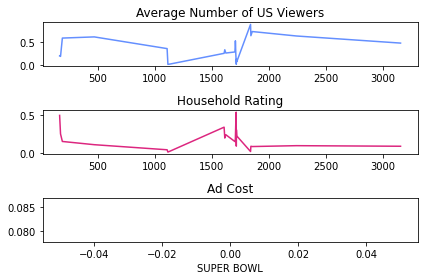

In [28]:
# Create a figure with 3x1 subplot and activate the top subplot
plt.subplot(3, 1, 1)
plt.plot(df.UGDS_WHITE, color='#648FFF')
plt.title('Average Number of US Viewers')

# Activate the middle subplot
plt.subplot(3, 1, 2)
plt.plot(df.UGDS_HISP, color='#DC267F')
plt.title('Household Rating')

# Activate the bottom subplot
plt.subplot(3, 1, 3)
plt.plot(df.UGDS_ASIAN.median(), color='#FFB000')
plt.title('Ad Cost')
plt.xlabel('SUPER BOWL')

# Improve the spacing between subplots
plt.tight_layout()

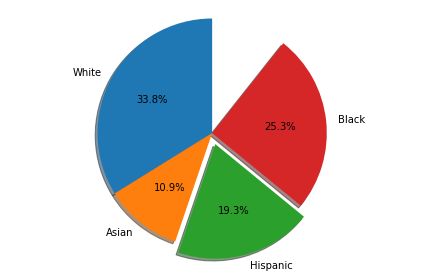

<Figure size 432x288 with 0 Axes>

In [29]:
# Pie Chart
labels = ['White', 'Asian', 'Hispanic', 'Black']
sizes = [df.UGDS_WHITE.mean(), df.UGDS_ASIAN.mean(), df.UGDS_HISP.mean(), df.UGDS_BLACK.mean()]

# only explode the 3rd slice
explode = (0, 0, 0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

ax1.axis('equal')

plt.tight_layout()
plt.show()
plt.savefig('pie_diverisity.png')